# music21: A Toolkit for Comupter-Aided Musicology

## Some examples to test basic music21 functionalities

### Imports and setup

To use music21 in this notebook and python, you have to import all (\*) routines  from music21 at first with the following command.

You’ll probably get a few warnings that you’re missing some optional modules. That’s okay. If you get a warning that “no module named music21” then something probably went wrong above.

In [1]:
%matplotlib inline
# import matplotlib

from music21 import *

Probably you have to set manually the correct file path to an Application that is able to open MusicXML files (like MuseScore). To do so, you can use the `music21.environment` module where you can set an `musicxmlPath` key.

Make sure to change below the string `path/to/your/musicXmlApplication` with the correct file path (keep the quotation marks):
- on Mac e.g.: `/Applications/MuseScore 2.app/Contents/MacOS/mscore` 
- or on Windows e.g.: `C:/Program Files (x86)/MuseScore 2/bin/MuseScore.exe`) 

and uncomment the line (remove the `#` at the begin of the line).

In the same way, you can also add a path to your lilypond installation, using
`env['lilypondPath']`:
- on Mac e.g.: `Applications/Lilypond.app`
- on Windows e.g.: `C:/Program Files (x86)/LilyPond/usr/bin/lilypond.exe`

In [5]:
# definition of user settings
environment.UserSettings()['lilypondPath']='/usr/bin/lilypond'

environment.set('pdfPath', '/usr/bin/musescore')
environment.set('graphicsPath', '/usr/bin/musescore')
environment.set('musescoreDirectPNGPath', '/usr/bin/musescore')
environment.set('musicxmlPath', '/usr/bin/musescore')

# re-definition of sho()-method ---> HACK from https://github.com/psychemedia/showntell/blob/music/index_music.ipynb
# see also this music21 issue: https://github.com/cuthbertLab/music21/issues/260
%load_ext music21.ipython21

from IPython.display import Image

def render(s):
    s.show('lily.png')
    return Image(filename=s.write('lily.png'))

# output of environment settings
print('Environment settings:')
print('musicXML: ', env['musicxmlPath'])
print('lilypond: ', env['lilypondPath'])
# print('musescore: ', env['musescoreDirectPNGPath'])

Environment settings:
musicXML:  C:\Program Files (x86)\MuseScore 2\bin\MuseScore.exe
lilypond:  C:\Program Files (x86)\LilyPond\usr\bin\lilypond.exe
musescore:  C:\Program Files (x86)\MuseScore 2\bin\MuseScore.exe


### Let's create some notes

One possible way to create notes, is to use the `Note()`-Object (CAPITAL LETTER) within music21's `note`-subModule (small letter).

Let's use the twelve-tone row of Alban Berg's Violin Concerto (1935) as an example. Take care how the different octaves and accidentals are declared.

In [25]:
note1 = note.Note("G3")     # declaration of first note
note2 = note.Note("B-3")
note3 = note.Note("D4")
note4 = note.Note("F#4")
note5 = note.Note("A4")
note6 = note.Note("C5")
note7 = note.Note("E5")
note8 = note.Note("G#5")
note9 = note.Note("B5")
note10 = note.Note("C#6")
note11 = note.Note("D#6")
note12 = note.Note("F6")

# combine the twelve notes in a row list
bergRow = [note1, note2, note3, note4, note5, note6, note7, note8, note9, note10, note11, note12]
bergRow    # output of bergRow (just using the name of the variable)

[<music21.note.Note G>,
 <music21.note.Note B->,
 <music21.note.Note D>,
 <music21.note.Note F#>,
 <music21.note.Note A>,
 <music21.note.Note C>,
 <music21.note.Note E>,
 <music21.note.Note G#>,
 <music21.note.Note B>,
 <music21.note.Note C#>,
 <music21.note.Note D#>,
 <music21.note.Note F>]

To iterate over every single item in a list, you can use a "FOR"-loop.

Syntax (indentation matters here!):

    for ITEM in LIST:    
        do something with ITEM
        ...


In [27]:
for currentNote in bergRow:                                    # for every note in bergRow list do...
    currentNote.duration.type = 'whole'                        # ... declare duration of a whole note
    print(currentNote.duration, currentNote.nameWithOctave)    # ... output of note duration and name (using the print command)

<music21.duration.Duration 4.0> G3
<music21.duration.Duration 4.0> B-3
<music21.duration.Duration 4.0> D4
<music21.duration.Duration 4.0> F#4
<music21.duration.Duration 4.0> A4
<music21.duration.Duration 4.0> C5
<music21.duration.Duration 4.0> E5
<music21.duration.Duration 4.0> G#5
<music21.duration.Duration 4.0> B5
<music21.duration.Duration 4.0> C#6
<music21.duration.Duration 4.0> D#6
<music21.duration.Duration 4.0> F6


### Create simple Streams

Streams are fundamental objects in music21. Almost everything (`Score`, `Parts`, `Voices`, `Measures` a.o.) is organized in terms of this abstract data structure. An empty stream is created by using the `Stream()`-Object (CAPITAL LETTER) within music21's `stream`-subModule (small letter).

In [29]:
bergStream = stream.Stream()        # create empty stream

for currentNote in bergRow:         # iterate over every note in bergRow and ...
    bergStream.append(currentNote)  # ... append current note to the stream

bergStream.show('text')             # output of the stream (using the .show()-method with option 'text'; compare to output above)

{0.0} <music21.note.Note G>
{4.0} <music21.note.Note B->
{8.0} <music21.note.Note D>
{12.0} <music21.note.Note F#>
{16.0} <music21.note.Note A>
{20.0} <music21.note.Note C>
{24.0} <music21.note.Note E>
{28.0} <music21.note.Note G#>
{32.0} <music21.note.Note B>
{36.0} <music21.note.Note C#>
{40.0} <music21.note.Note D#>
{44.0} <music21.note.Note F>


You can get the length of a stream, what is the number of items in it, with `len(STREAM)`:

In [31]:
len(bergStream)

12

... or with just counting the Note-Elements (here you have to flatten the stream):

In [32]:
len(bergStream.flat.getElementsByClass(note.Note))

12

But let's have a look at the stream now. Calling the `.show()`-method without any option will display a graphical visualisation of any music object via the musicxmlApplication defined in the environment at the beginning of this notebook.

If you encounter problems here, make sure you have set the correct environment settings for `musicxmlPath` and `musescoreDirectPNGPath`.

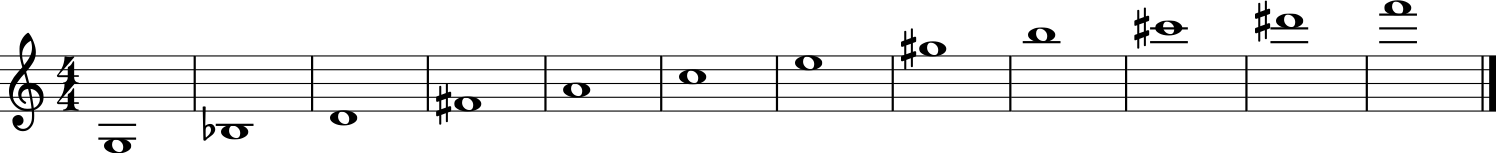

In [48]:
bergStream.show()

You can also use further options to get the output as `pdf` or `png` via `lilypond`:

In [50]:
bergStream.show('lily.pdf')

In [51]:
bergStream.show('lily.png')

### Ok nice, but where is the analytical part?

music21 provides a large amount of build-in analytical tools.

To start right away, just let's get the ambitus of the row in the stream using the `.analyze()`-method:

In [52]:
bergStream.analyze('ambitus')

<music21.interval.Interval m21>

The twelve-tone row of Berg's Violin Concerto is special because of its two major triads, two minor triads and a part of the whole tone scale. Let's separate these elements into new `Chord()`-Objects (part of `chord`-submodule):

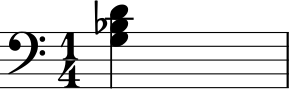

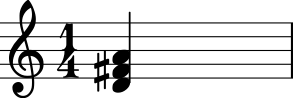

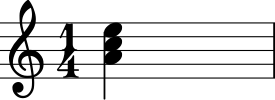

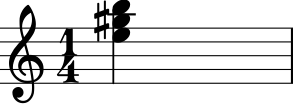

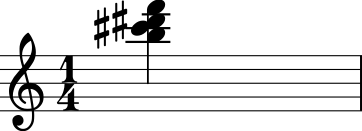

In [53]:
# declare some variables as Chord()-Objects
triad1 = chord.Chord()
triad2 = chord.Chord()
triad3 = chord.Chord()
triad4 = chord.Chord()
wtScale = chord.Chord()

# iterate over the first three notes in the stream
for currentNote in bergStream[0:3]:
    triad1.add(currentNote)           # add the currentNote to the Chord()

# ...
for currentNote in bergStream[2:5]:
    triad2.add(currentNote)

# ...
for currentNote in bergStream[4:7]:
    triad3.add(currentNote)

# ...
for currentNote in bergStream[6:9]:
    triad4.add(currentNote)

# iterate over the last three notes in the stream
for currentNote in bergStream[8:12]:
    wtScale.add(currentNote)

# output the 5 chords
triad1.show()
triad2.show()
triad3.show()
triad4.show()
wtScale.show()

You can recombine multiple Chords() within a new Chord()-Object:

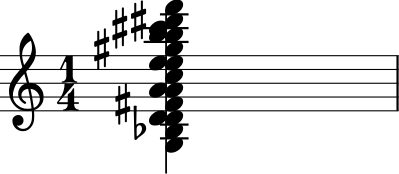

In [55]:
fullChord = chord.Chord([triad1, triad2, triad3, triad4, wtScale])

fullChord.show()

You can also append the chords to a new Stream()-Object:

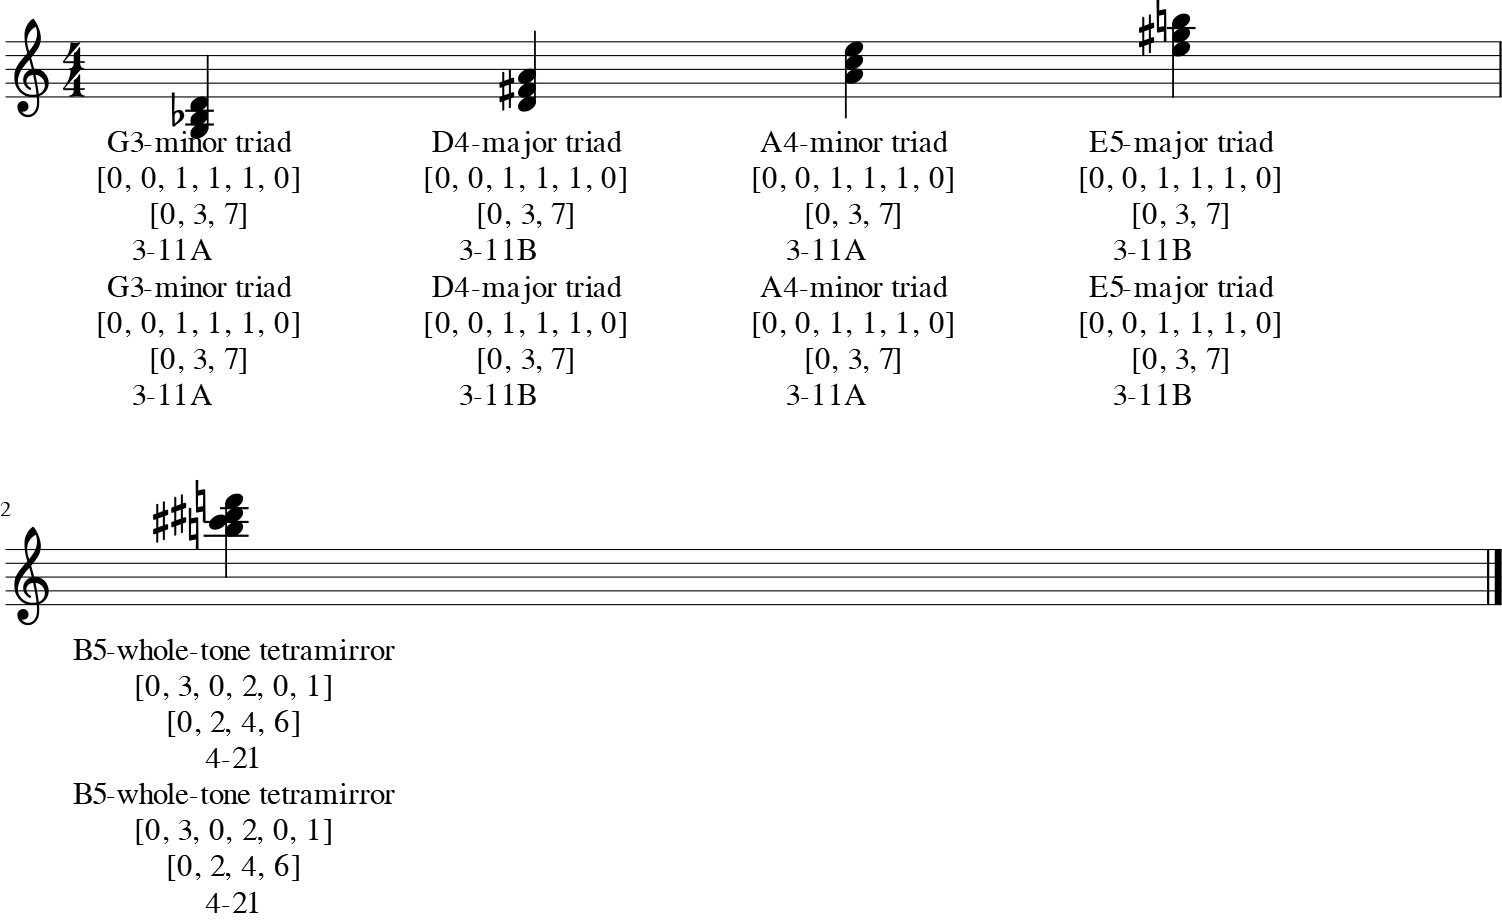

In [59]:
# create empty stream
chordsStream = stream.Stream()

# append all the triads to the stream
chordsStream.append(triad1);
chordsStream.append(triad2);
chordsStream.append(triad3);
chordsStream.append(triad4);
chordsStream.append(wtScale);

chordsStream.show()

And you can add some analytical descriptions to the objects using the `.addLyric()`-method and different attributes (e.g. `pitchedCommonName`, `intervalVector`, `primeForm`, `forteClass`) of the chords:

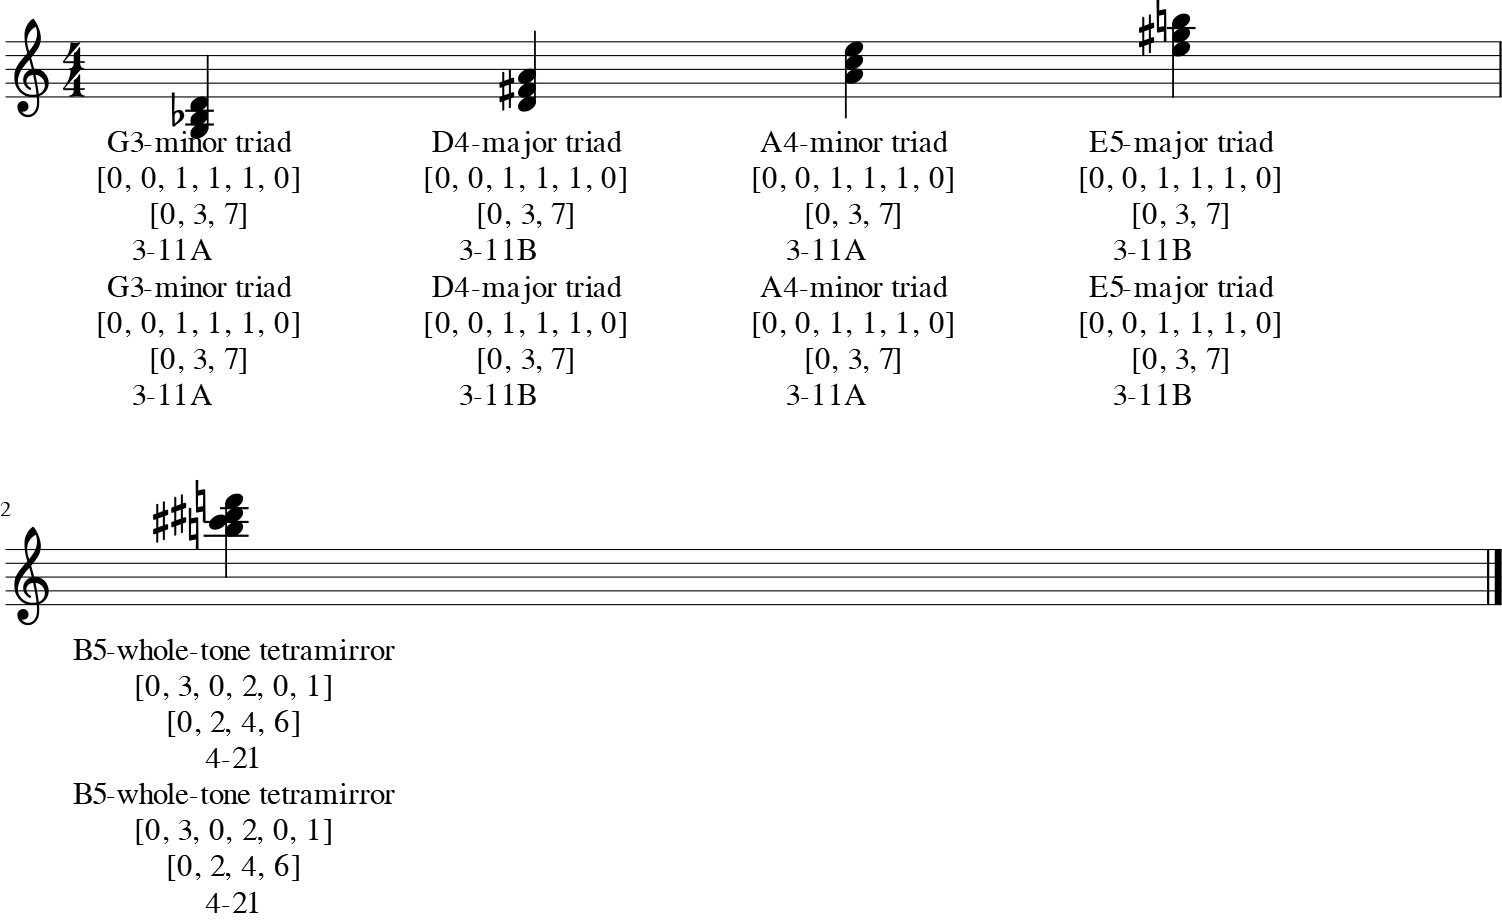

In [58]:
# iterate over every chord in the stream, and ...
for currentChord in chordsStream:
    currentChord.addLyric(currentChord.pitchedCommonName)    # ... add triad name
    currentChord.addLyric(currentChord.intervalVector)       # ... add interval vector
    currentChord.addLyric(currentChord.primeForm)            # ... add prime form
    currentChord.addLyric(currentChord.forteClass)           # ... add forte class

chordsStream.show()

## Starting with corpus analysis

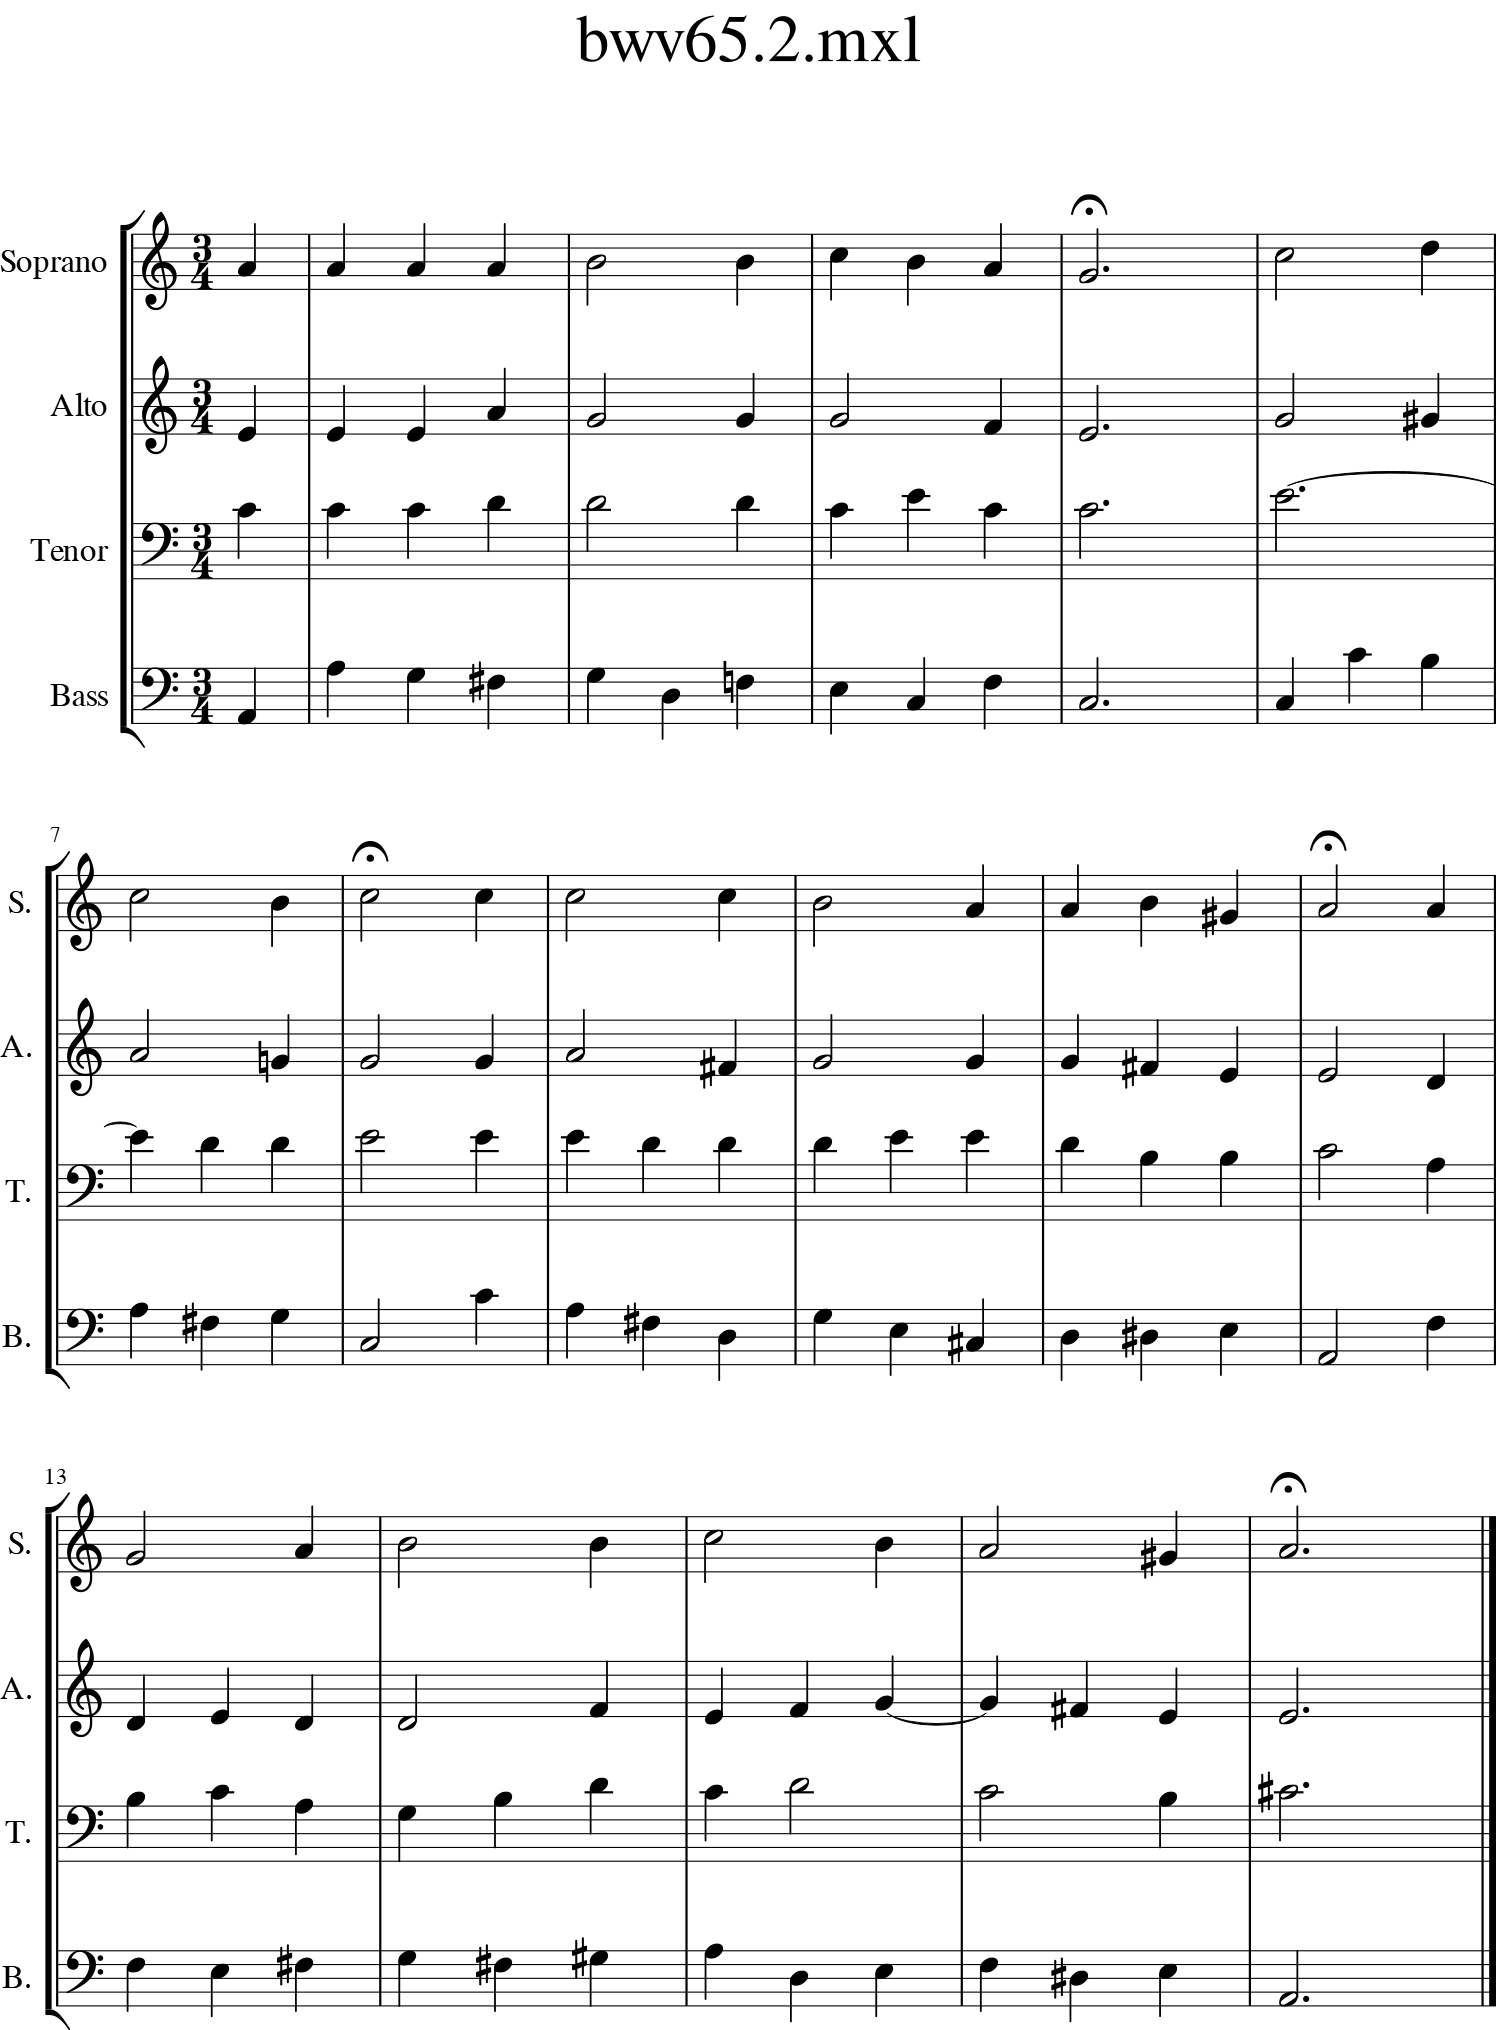

In [67]:
s = corpus.parse('bach/bwv65.2.xml')
s.show()

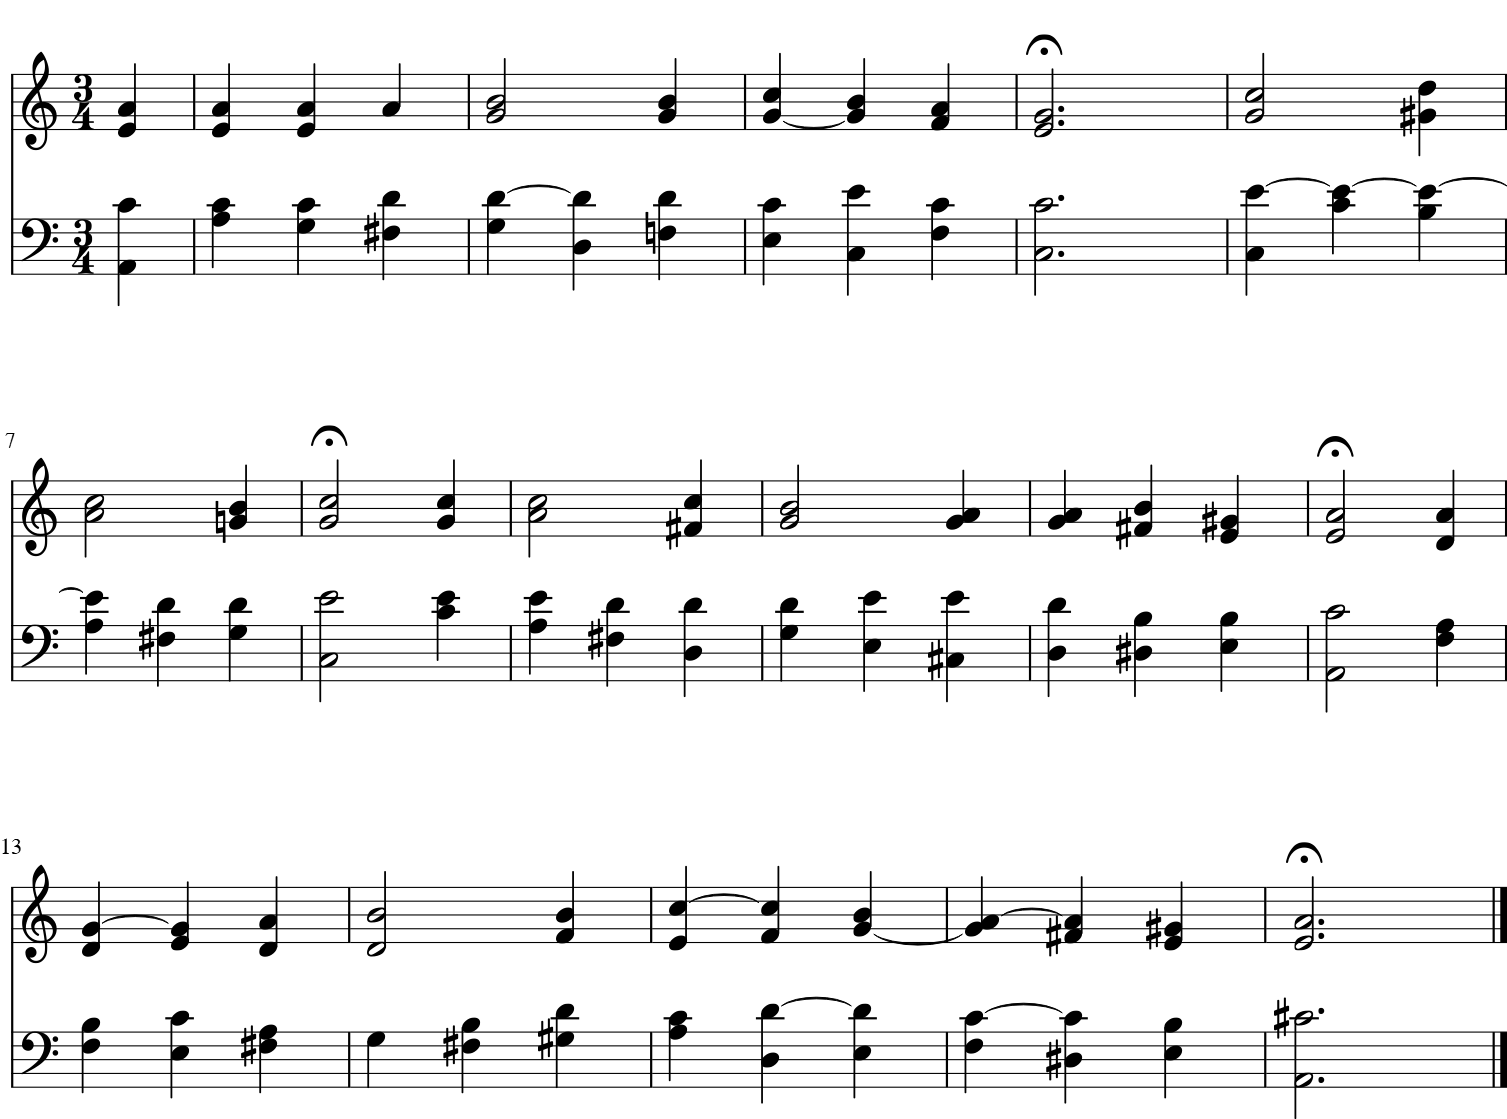

In [68]:
fVoices = stream.Score((s.parts['Soprano'], s.parts['Alto'])).chordify()
mVoices = stream.Score((s.parts['Tenor'], s.parts['Bass'])).chordify()

chorale2p = stream.Score((fVoices, mVoices))
chorale2p.show()

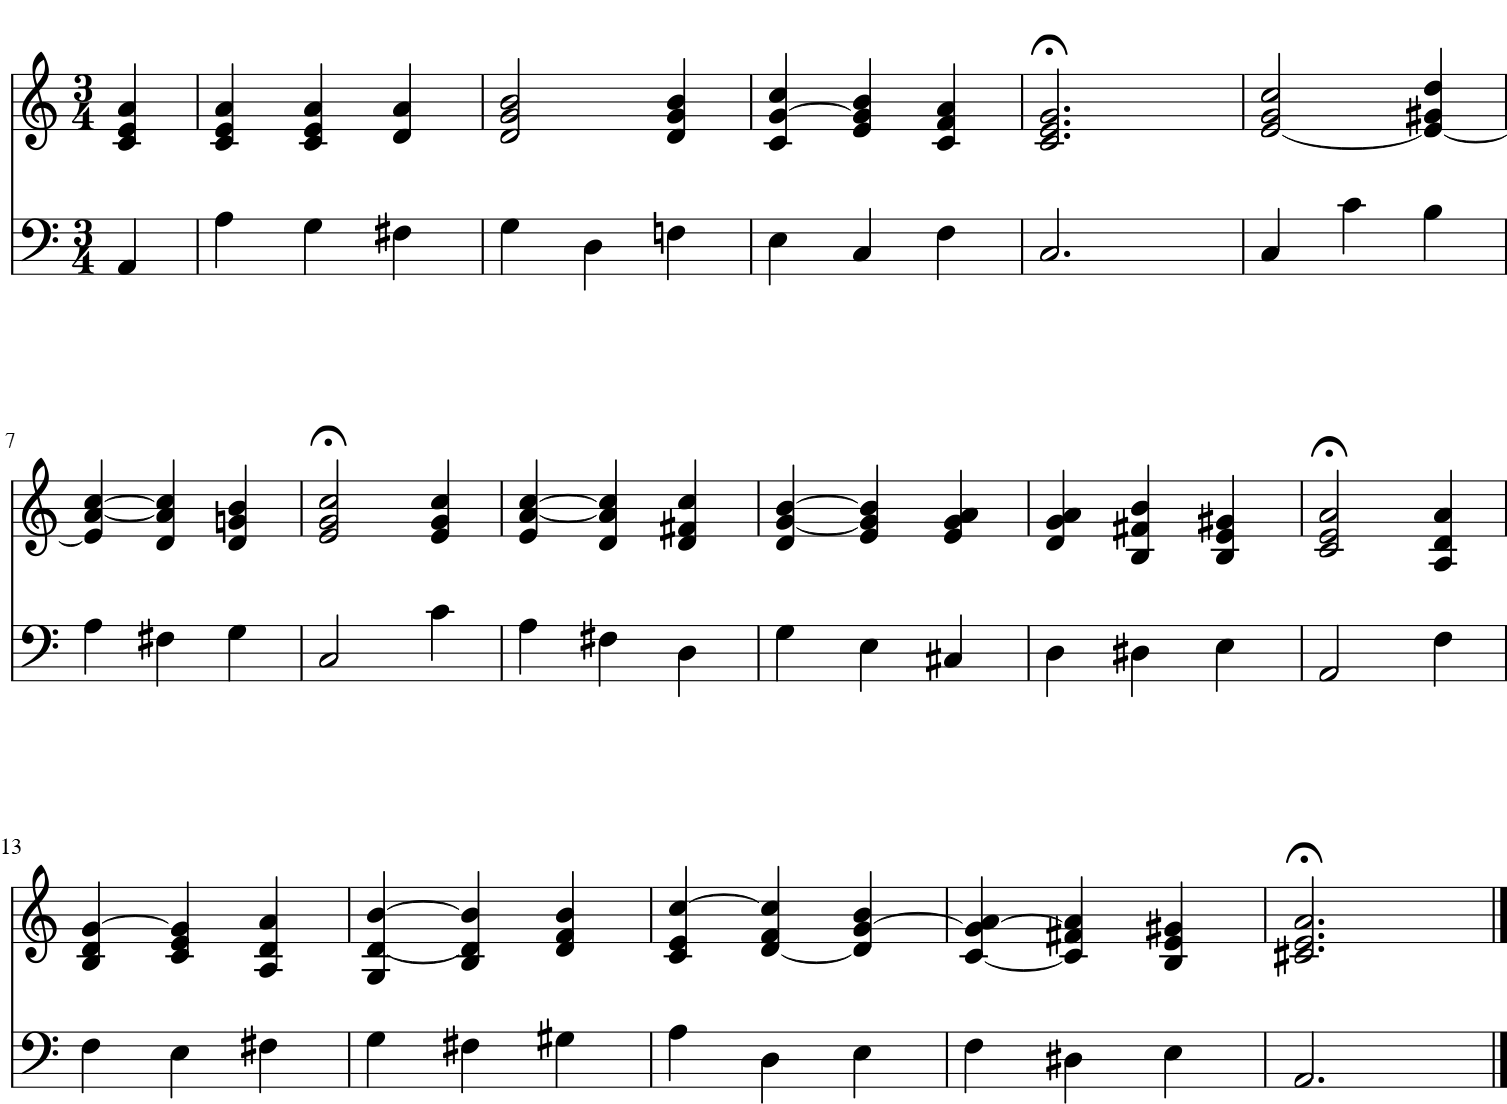

In [69]:
upperVoices = stream.Score((s.parts['Soprano'], s.parts['Alto'], s.parts['Tenor'])).chordify()
bass = stream.Score((s.parts['Bass'])).chordify()

chorale3p = stream.Score((upperVoices, bass))
chorale3p.show()


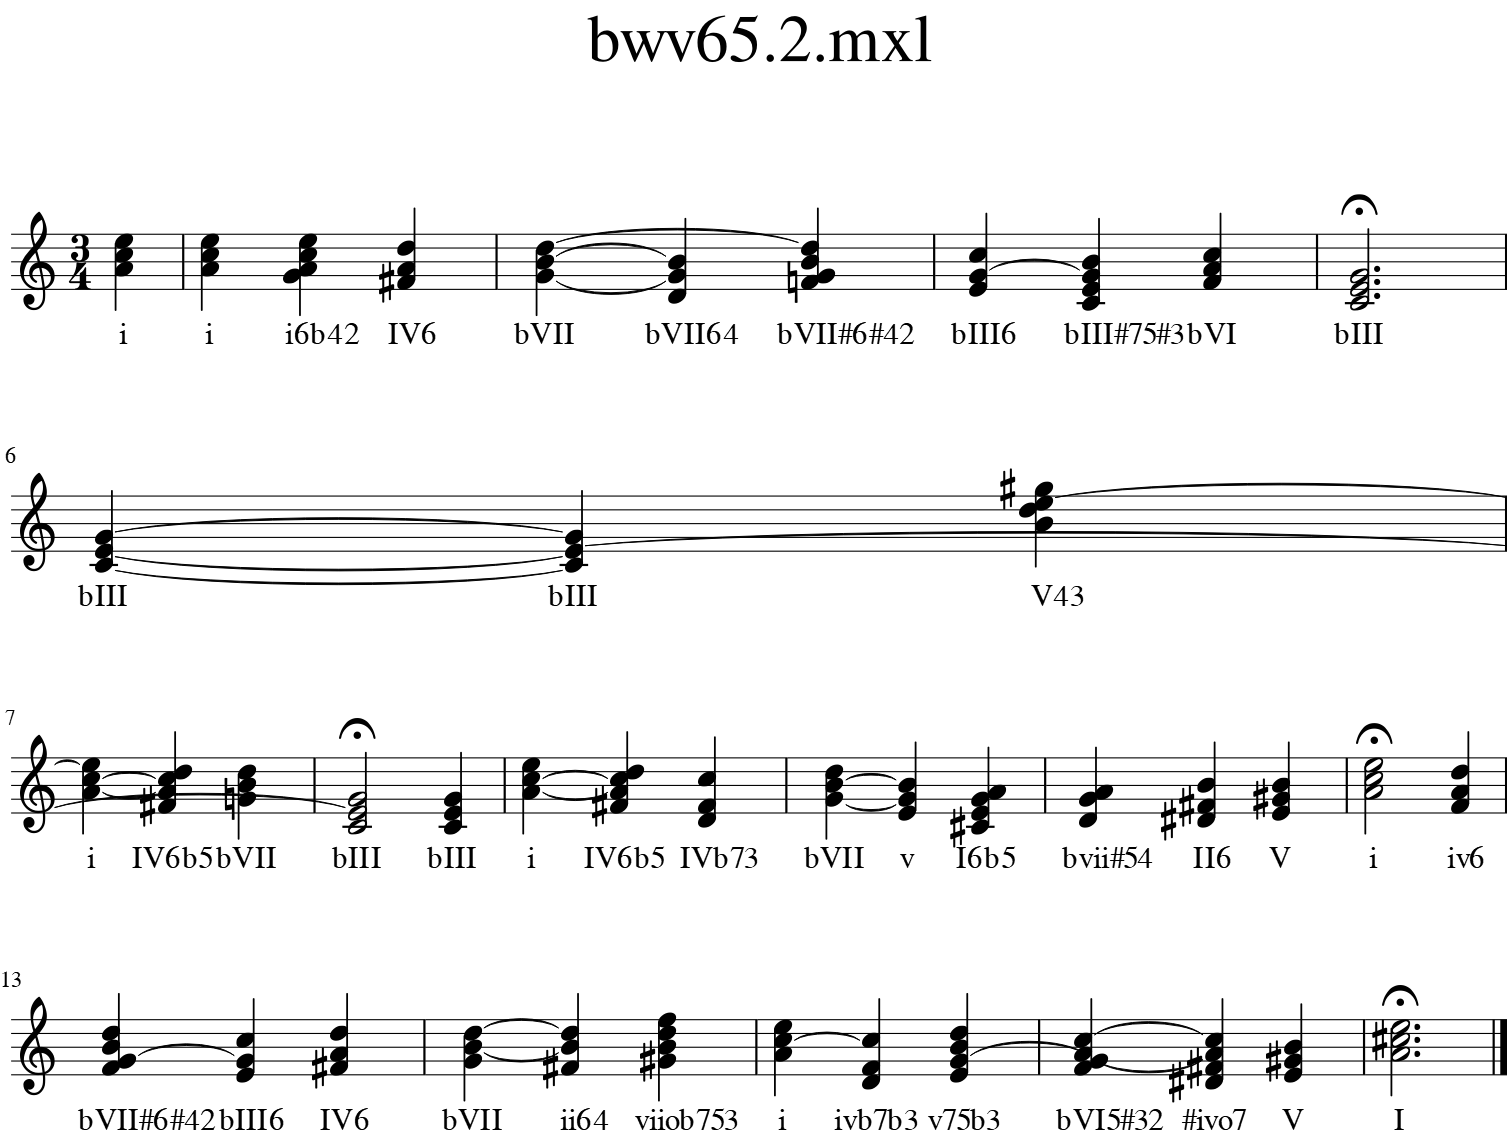

In [70]:
choraleChords = chorale3p.chordify()

for c in choraleChords.recurse().getElementsByClass('Chord'):
    c.closedPosition(forceOctave=4, inPlace=True)
    rn = roman.romanNumeralFromChord(c, key.Key('A'))
    c.addLyric(str(rn.figure))

choraleChords.show()

## Another example

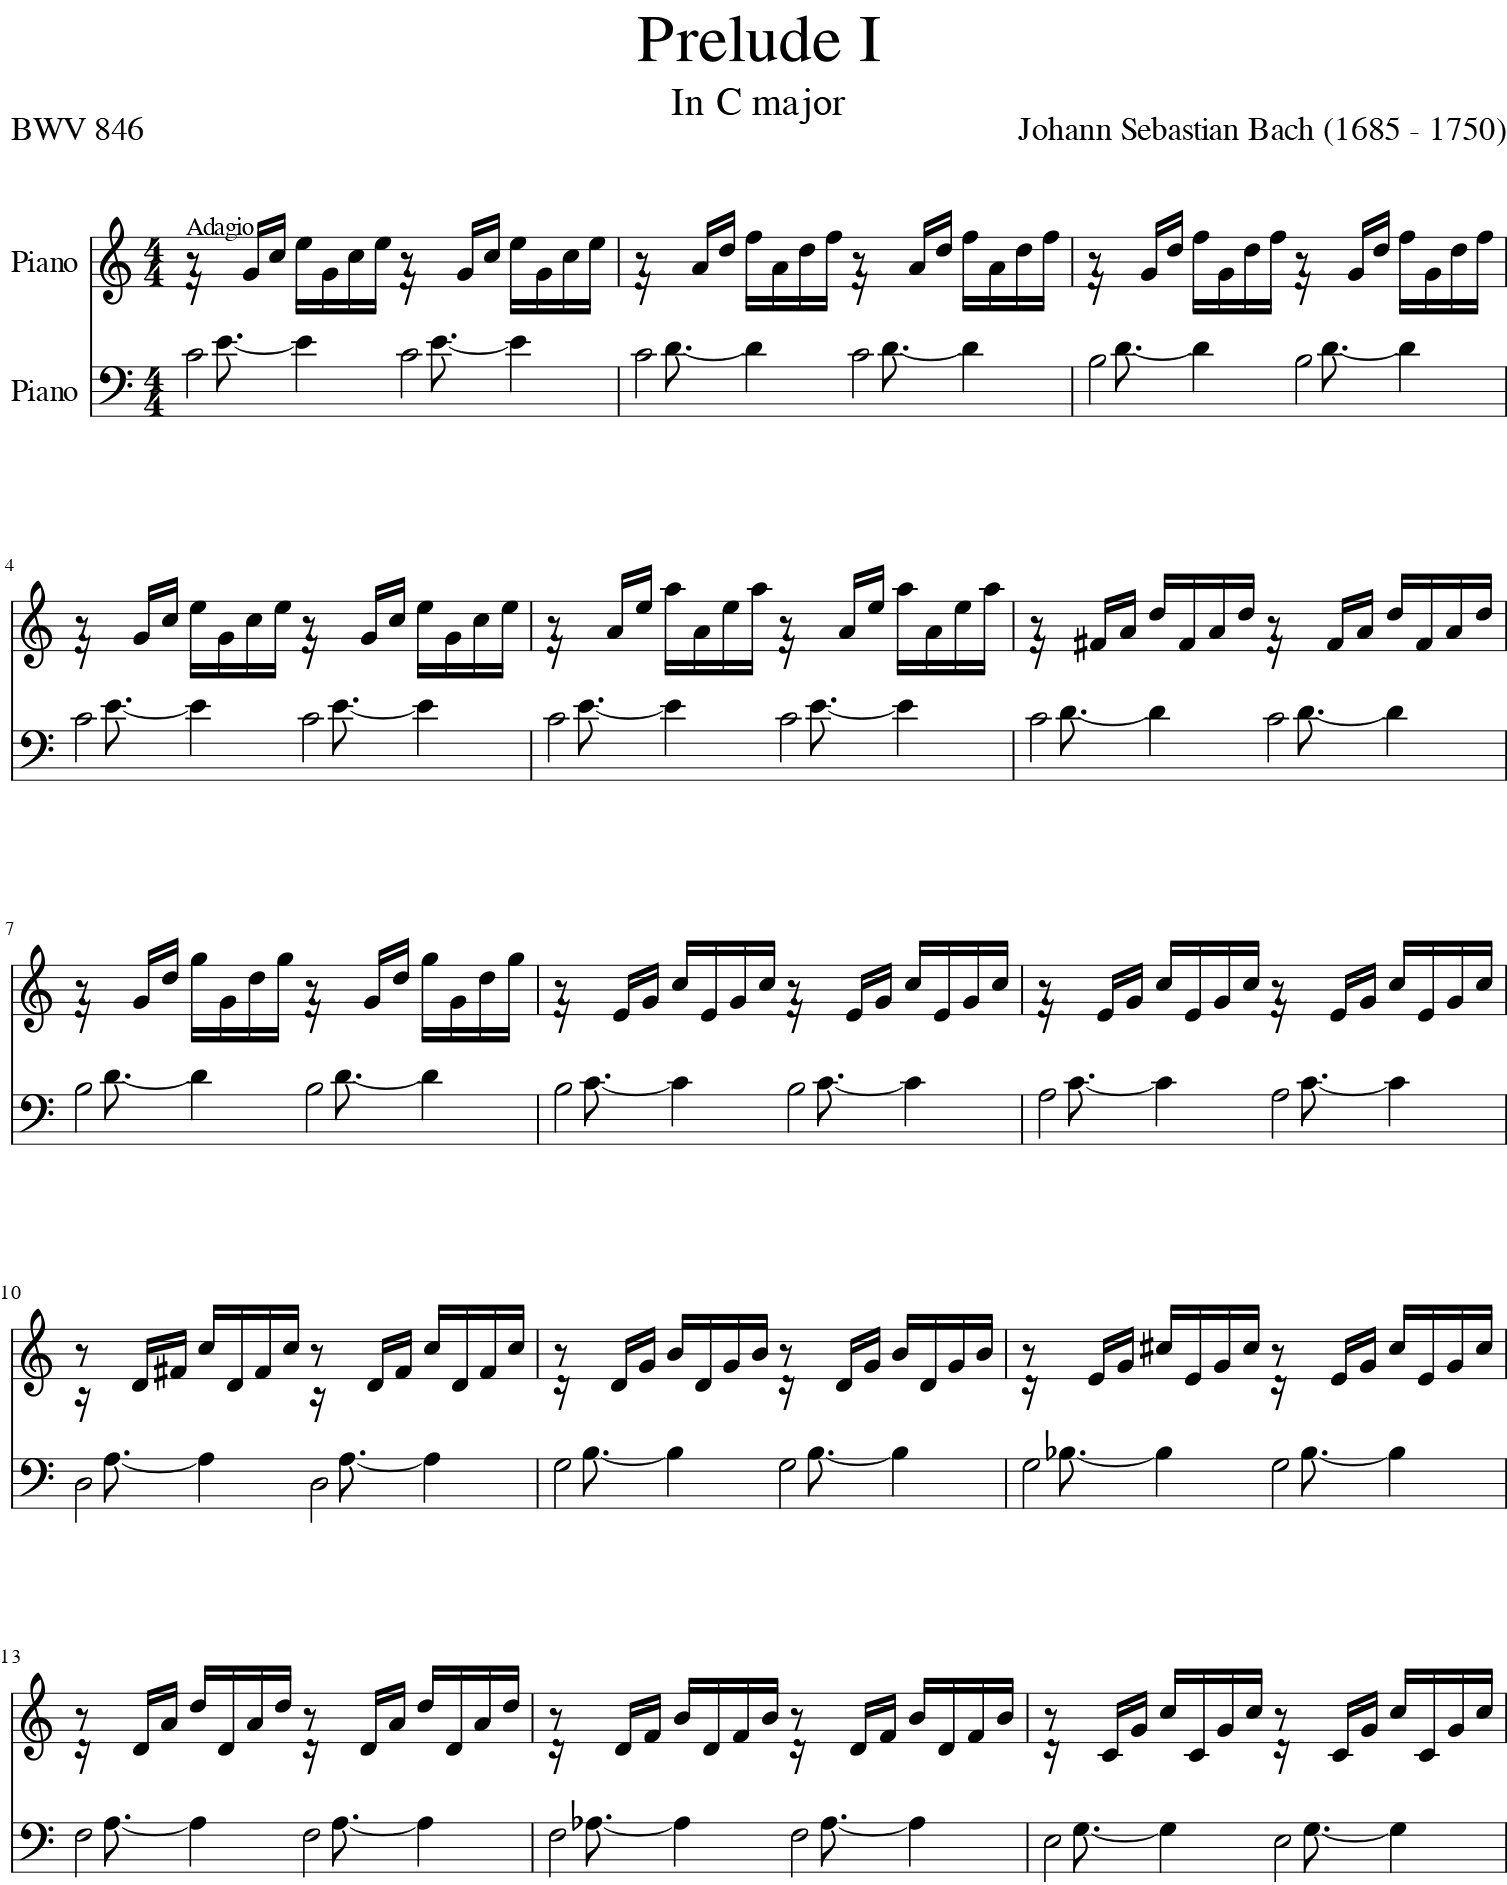

In [6]:
p = corpus.parse('bach/bwv846.xml')
p.show()

In [4]:
p.analyze('key')

<music21.key.Key of C major>

In [5]:
p.show('text')

{0.0} <music21.text.TextBox "Prelude I">
{0.0} <music21.text.TextBox "In C major">
{0.0} <music21.text.TextBox "Johann Seb...">
{0.0} <music21.text.TextBox "BWV 846">
{0.0} <music21.metadata.Metadata object at 0x1136c7fd0>
{0.0} <music21.stream.PartStaff P1-Staff1>
    {0.0} <music21.instrument.Instrument P1: Piano: Piano>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.expressions.TextExpression "Adagio">
        {0.0} <music21.layout.SystemLayout>
        {0.0} <music21.clef.TrebleClef>
        {0.0} <music21.key.Key of C major>
        {0.0} <music21.meter.TimeSignature 4/4>
        {0.0} <music21.note.Rest rest>
        {0.5} <music21.note.Note G>
        {0.75} <music21.note.Note C>
        {1.0} <music21.note.Note E>
        {1.25} <music21.note.Note G>
        {1.5} <music21.note.Note C>
        {1.75} <music21.note.Note E>
        {2.0} <music21.note.Rest rest>
        {2.5} <music21.note.Note G>
        {2.75} <music21.note.Note C>
        {3.0} <music21

In [38]:
len(p.parts)

2

In [7]:
len(p.flat.notes)

598

In [45]:
post = p.flattenParts('Note')
post.show('text')

{0.0} <music21.instrument.Instrument P1: Piano: Piano>
{0.0} <music21.stream.Measure 1 offset=0.0>
    {0.0} <music21.layout.SystemLayout>
    {0.0} <music21.clef.TrebleClef>
    {0.0} <music21.key.Key of C major>
    {0.0} <music21.meter.TimeSignature 4/4>
{4.0} <music21.stream.Measure 2 offset=4.0>

{8.0} <music21.stream.Measure 3 offset=8.0>

{12.0} <music21.stream.Measure 4 offset=12.0>
    {0.0} <music21.layout.SystemLayout>
{16.0} <music21.stream.Measure 5 offset=16.0>

{20.0} <music21.stream.Measure 6 offset=20.0>

{24.0} <music21.stream.Measure 7 offset=24.0>
    {0.0} <music21.layout.SystemLayout>
{28.0} <music21.stream.Measure 8 offset=28.0>

{32.0} <music21.stream.Measure 9 offset=32.0>

{36.0} <music21.stream.Measure 10 offset=36.0>
    {0.0} <music21.layout.SystemLayout>
{40.0} <music21.stream.Measure 11 offset=40.0>

{44.0} <music21.stream.Measure 12 offset=44.0>

{48.0} <music21.stream.Measure 13 offset=48.0>
    {0.0} <music21.layout.SystemLayout>
{52.0} <music21.stream

In [7]:
mChord = chord.Chord()
#for m in p.recurse().getElementsByClass('Measure'):

for el in p.flat.notes:
    tup = (el, el.offset, el.activeSite)
    print(tup)

#for m in p.measures(1,6):    
 #   flatNotes = m.flat.notes
 #   flatNotes.show('text')
 #   for flatNote in flatNotes:
 #        mChord.add(flatNote)
 #   rem = mChord.removeRedundantPitchClasses()
 #   bChord.show('text')
    #flatChords = e.chordify()
    #bChords.app
    #print(flatNotes)
    #flatNotes.show()
    print('-----')



(<music21.note.Note C>, 0.0, <music21.stream.Score 0x1136ceba8_flat>)
-----
(<music21.note.Note E>, 0.25, <music21.stream.Score 0x1136ceba8_flat>)
-----
(<music21.note.Note G>, 0.5, <music21.stream.Score 0x1136ceba8_flat>)
-----
(<music21.note.Note C>, 0.75, <music21.stream.Score 0x1136ceba8_flat>)
-----
(<music21.note.Note E>, 1.0, <music21.stream.Score 0x1136ceba8_flat>)
-----
(<music21.note.Note E>, 1.0, <music21.stream.Score 0x1136ceba8_flat>)
-----
(<music21.note.Note G>, 1.25, <music21.stream.Score 0x1136ceba8_flat>)
-----
(<music21.note.Note C>, 1.5, <music21.stream.Score 0x1136ceba8_flat>)
-----
(<music21.note.Note E>, 1.75, <music21.stream.Score 0x1136ceba8_flat>)
-----
(<music21.note.Note C>, 2.0, <music21.stream.Score 0x1136ceba8_flat>)
-----
(<music21.note.Note E>, 2.25, <music21.stream.Score 0x1136ceba8_flat>)
-----
(<music21.note.Note G>, 2.5, <music21.stream.Score 0x1136ceba8_flat>)
-----
(<music21.note.Note C>, 2.75, <music21.stream.Score 0x1136ceba8_flat>)
-----
(<musi

In [11]:
graph.findPlot.FORMATS

['horizontalbar',
 'histogram',
 'scatter',
 'scatterweighted',
 '3dbars',
 'colorgrid',
 'horizontalbarweighted']

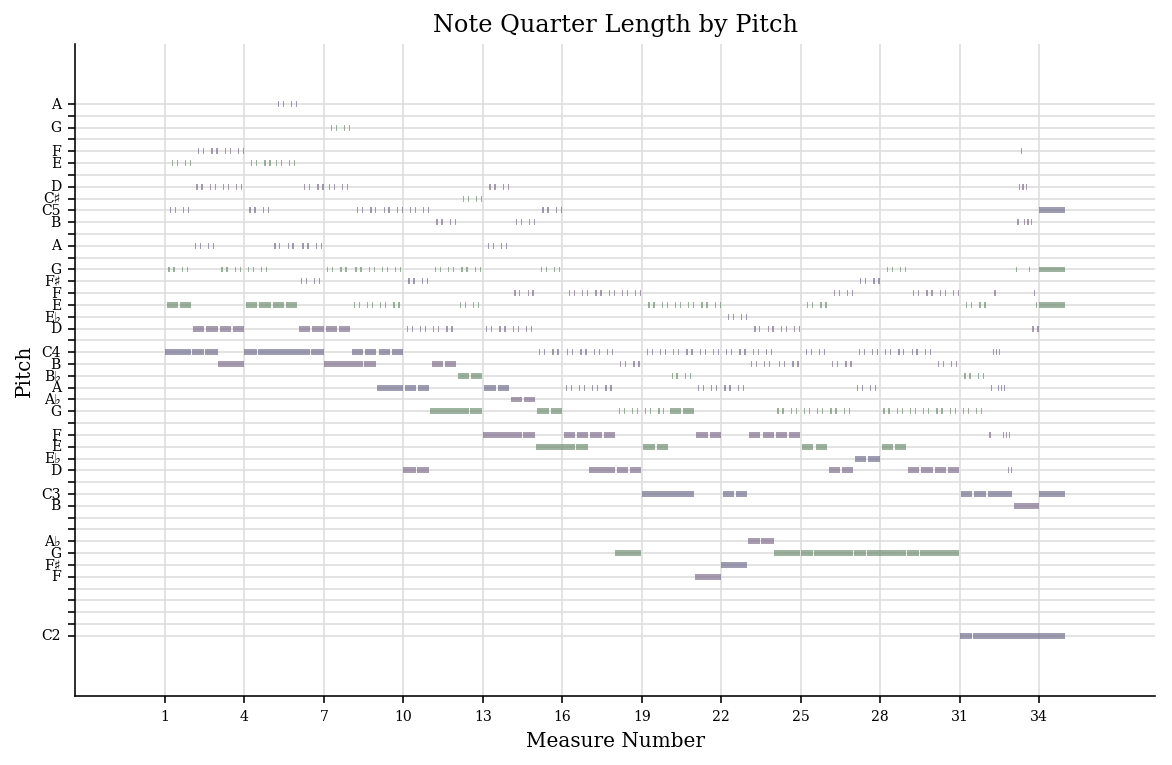

In [16]:
p.plot('pianoroll')

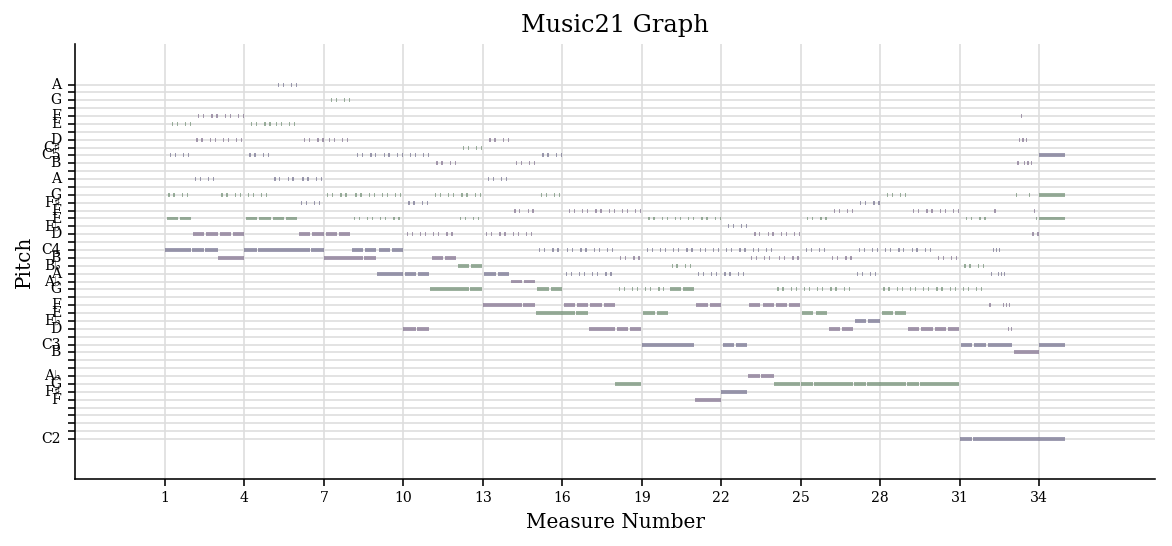

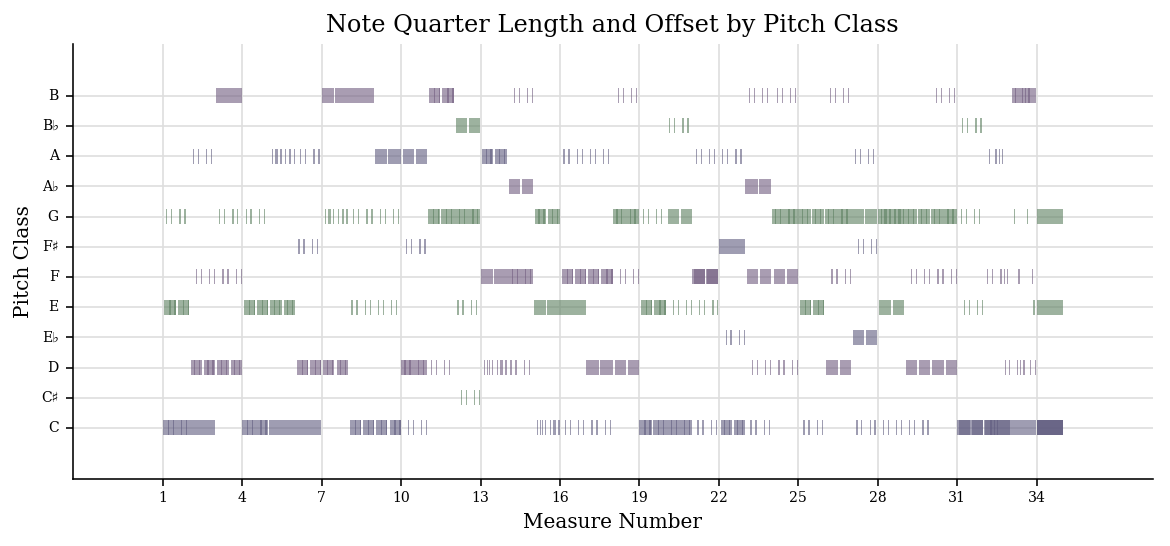

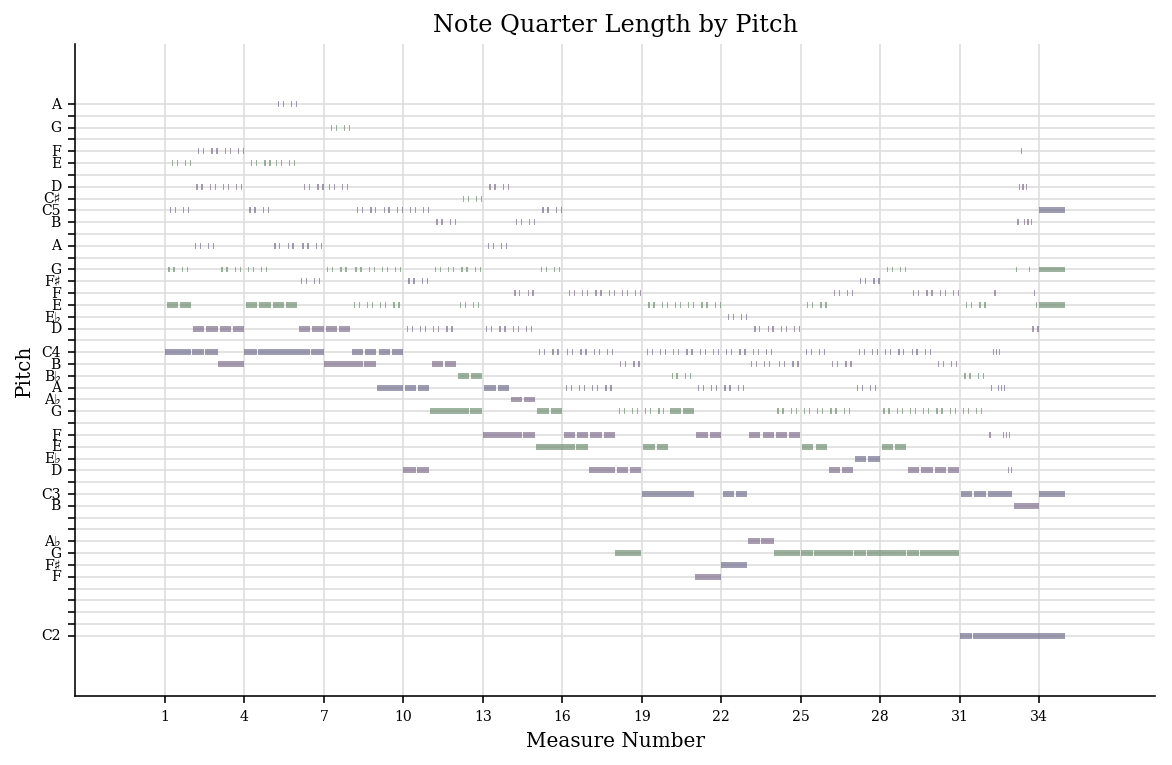

In [10]:
p.plot('horizontalbar')